
# Proyecto 8

En este proyecto se pondrán en práctica las habilidades adquiridas en la sección de análisis de negocio. 
Para ello, se realiza el ejercicio de optimizar los gastos de marketing en la empresa Y. Afisha utilizando los datos suministrados por el departamento analítico correspondientes de enero de 2017 a diciembre de 2018. Se busca obtener información sobre el comportamiento de los clientes al usar el servicio, cuánto dinero aportan individualmente a la compañía y en qué momento los ingresos cubren el costo de adquisición de los clientes. 

## Metodología

Para el desarrollo de este proyecto se deben seguir una serie de pasos que nos permitirán alcanzar el objetivo del proyecto.

- **Preparación de los datos**: En esta sección se toman los datos en "limpio" (sin modificaciones), se hace un análisis preliminar para conocer los datos y a partir de ahí, se toma la decisión de las modificaciones más convenientes que eliminen posibles errores y faciliten los siguientes pasos. En esta ocasión, se nos pide optimizar los datos para el análisis, así que se debe prestar especial atención que los tipos de datos sean los adecuados.

- **Análisis de Negocio**: En esta sección se busca obtener información importante a partir de los datos procesados adecuadamente. Se redactan informes con ayuda del cálculo de métricas que nos permitan analizar el rendimiento de diversos procesos o elementos dentro de la organización, esto con el fin de tomar acciones orientadas al beneficio de la misma. 

## Preparación de los datos

Como primer acercamiento debemos conocer el dataset de interés para tomar las medidas más convenientes que nos permitan hacer los arreglos necesarios de forma que los elementos e información del dataset sea la más adecuada para hacer el análisis sin mayor problema. 

Para lograr esto debemos seguir los siguientes pasos:
1. Comprensión general del dataset usando una pequeña muestra.
2. Optimización de los datos.
3. Tratamiento de valores ausentes.
4. Valores duplicados.

Se comienza el trabajo al importar las librerias necesarias y leer los archivos de datos para construir el dataframe mediante Pandas.

In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Cargamos las muestras de los datasets con los que trabajaremos, preliminarmente cargamos solo 500 filas.
visits = pd.read_csv('visits_log_us.csv',nrows=500)
orders = pd.read_csv('orders_log_us.csv',nrows=500)
costs = pd.read_csv('costs_us.csv',nrows=500)

### Visits

#### Comprensión general del dataset

El dataframe 'visits' contiene información sobre los registros del servidor con datos sobre las visitas al sitio web. Mostramos la información del dataframe y una pequeña muestra.

In [3]:
#Mostramos una muestra de 5 filas del DF
display(visits.sample(5))
#Mostramos la información del DF junto con el espacio en memoria de la muestra
visits.info(memory_usage='deep')

,Device,End Ts,Source Id,Start Ts,Uid
333,desktop,2017-11-04 23:53:00,2,2017-11-04 23:30:00,439353376133384361
30,desktop,2018-04-05 09:27:00,2,2018-04-05 09:24:00,2655976123871714644
113,touch,2017-07-05 08:59:00,4,2017-07-05 08:56:00,13439224746474635596
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
462,desktop,2017-09-18 20:42:00,4,2017-09-18 20:39:00,6639306065312178296


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 101.4 KB


Los datos se dividen en 5 columnas:
- **Device**: 
    - Descripción: Contiene el dispositivo del usuario.
    - Tipo de dato: Objeto, almacena strings.
    - Valores ausentes: En esta muestra no aparecen valores ausentes.
- **End Ts**: 
    - Descripción: Fecha y hora del término de la sesión.
    - Tipo de dato: Objeto, almacena fechas en formato AAAA-MM-DD.
    - Valores ausentes: En esta muestra no aparecen valores ausentes.
- **Source Id**: 
    - Descripción: Identificador de la fuente de anuncios de la que proviene el usuario.
    - Tipo de dato: Entero, almacena números.
    - Valores ausentes: En esta muestra no aparecen valores ausentes.
- **Start Ts**: 
    - Descripción: Fecha y hora de inicio de la sesión.
    - Tipo de dato: Objeto, almacena fechas en formato AAAA-MM-DD.
    - Valores ausentes: En esta muestra no aparecen valores ausentes.
- **Uid**: 
    - Descripción: Identificador único del usuario.
    - Tipo de dato: Entero sin signo, almacena números.
    - Valores ausentes: En esta muestra no aparecen valores ausentes.
    
Es importante señalar que los nombres de las columnas no cuentan con la convención snake_case, por lo que haremos el cambio más adelante.
    
#### Optimización de los datos.

Debemos optimizar los datos, eso significa utilizar lo menos posible el tipo 'object' ya que ocupa bastante memoria, por lo que debemos analizar las columnas que los contengan: Device, End Ts y Start Ts.

In [4]:
#Función que nos ayuda a imprimir los valores únicos en una columna o un Series y cómo se distribuyen.
def val_nuniq(columna):
    print('Lista de valores únicos y su distribución en:', columna.name) #Se muestra el nombre de la columna
    print(columna.value_counts()) #Se muestra la distribución de valores únicos
    return None

In [5]:
#Analizamos los datos existentes en la columna 'Device':
val_nuniq(visits['Device'])

Lista de valores únicos y su distribución en: Device
Device
desktop    363
touch      137
Name: count, dtype: int64


Notamos que solo se muestran 2 valores: 'desktop' y 'touch' lo que probablemente se refiere a la categoría del dispositivo que utilizó el usuario. De esta manera, al solo tener dos valores en la columna podemos utilizar el tipo de dato 'category' que es muy parecido a 'object' pero usa menos espacio.

En las columnas 'Start Ts' y 'End Ts' tenemos los datos de fecha y hora, la fecha en formato AAAA-MM-DD, esto almecenado en strings, lo cual hace que se utilice bastante espacio, para ello convertiremos al tipo 'datetime', el cual es más "ligero".

Con esto, completamos el análisis preliminar, ahora podemos cargar el dataset completo pasando las conversiones correspondientes desde el momento de la lectura.

In [6]:
#Cargamos el dataset completo realizando la conversión de tipo de datos correspondientes
visits = pd.read_csv('visits_log_us.csv', dtype={'Device':'category'}, parse_dates=['Start Ts','End Ts'])
#Mostramos la información del DF junto a su espacio en memoria
visits.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [7]:
#Función que nos ayuda a transformar los nombres de las columnas a la convención snake_case
def snake_case(columns_list):
    #Convertimos a minusculas
    columns_list = columns_list.str.lower()
    new_cols = [] #Lista vacia
    for old in columns_list:
        no_spaces = old.replace(' ','_') #Reemplazamos espacios por guión bajo
        new_cols.append(no_spaces) #Agregamos a la lista 
    return new_cols #regresamos la lista con los nombres en snake_case

In [8]:
#Transformarmos el nombre de las columnas a la convención snake_case
visits.columns = snake_case(visits.columns)
print(visits.head(2)) #Mostramos el resultado

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  


#### Tratamiento de valores ausentes.

No hay presencia de valores ausentes.

#### Valores duplicados.
Haremos un pequeño análisis sobre la presencia de valores duplicados:

In [9]:
#Imprimimos el número de valores duplicados
print('Número de valores duplicados:\n',visits[visits.duplicated()].count())

Número de valores duplicados:
 device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64


No hay presencia de valores duplicados, por lo que ya está listo este conjunto de datos.

### Orders

#### Comprensión general del dataset

El dataframe 'orders' contiene información sobre los datos de los pedidos. Mostramos la información del dataframe y una pequeña muestra.

In [10]:
#Mostramos una muestra de 5 filas del DF
display(orders.sample(5))
#Mostramos la informacion del Df junto con el espacio en memoria de la muestra
orders.info(memory_usage='deep')

,Buy Ts,Revenue,Uid
290,2017-06-04 12:28:00,0.92,14784846369406963928
457,2017-06-05 19:20:00,9.90,148401564840028266
66,2017-06-01 21:09:00,2.44,9729244501093943694
31,2017-06-01 14:36:00,0.24,13830803930846284958
146,2017-06-02 13:16:00,0.37,3146568862597774354


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 41.1 KB


Los datos se dividen en 3 columnas:
- **Buy Ts**: 
    - Descripción: Fecha y hora del pedido.
    - Tipo de dato: Objeto, almacena fechas.
    - Valores ausentes: No hay presencia de valores ausentes en esta muestra.
- **Revenue**: 
    - Descripción: Ingresos de Y.Afisha del pedido.
    - Tipo de dato: Flotante, almacena el valor del pedido.
    - Valores ausentes: No hay presencia de valores ausentes en esta muestra.
- **Uid**: 
    - Descripción: Identificador único del usuario que realiza el pedido.
    - Tipo de dato: Entero sin signo, almacena números.
    - Valores ausentes: No hay presencia de valores ausentes en esta muestra.
 
Es importante señalar que los nombres de las columnas no cuentan con la convención snake_case, por lo que haremos el cambio más adelante.

    
#### Optimización de los datos.

Como explicamos anteriormente, debemos analizar las columnas que tengan el tipo de dato 'object'.

De igual forma que en el conjunto anterior, la columna **'Buy Ts'** almacena fechas en formato AAAA-MM-DD como strings, los cuales utilizan bastante espacio y hay que transformarlos al tipo 'datetime'.

Siendo este el único cambio de tipo de dato para este conjunto de datos, procedemos a cargar el dataset completo con las conversiones correspondientes.

In [11]:
#Cargamos el dataset completo realizando la conversión de las fechas a datetime
orders = pd.read_csv('orders_log_us.csv', parse_dates=['Buy Ts'])
#Mostramos la información del DF junto a su espacio en memoria.
orders.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [12]:
#Transformarmos el nombre de las columnas a la convención snake_case
orders.columns = snake_case(orders.columns)
print(orders.head(2)) #Mostramos el resultado

               buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447


#### Tratamiento de valores ausentes.

No hay presencia de valores ausentes.

#### Valores duplicados.
Haremos un pequeño análisis sobre la presencia de valores duplicados:

In [13]:
#Imprimimos el número de valores duplicados
print('Número de valores duplicados:\n',orders[orders.duplicated()].count())

Número de valores duplicados:
 buy_ts     0
revenue    0
uid        0
dtype: int64


No hay presencia de valores duplicados, por lo que ya está listo este conjunto de datos.


### Costs

#### Comprensión general del dataset

El dataframe 'costs' contiene información sobre los datos de los gastos de marketing. Mostramos la información del dataframe y una pequeña muestra.

In [14]:
#Mostramos una muestra de 5 filas del conjunto de datos
display(costs.sample(5))
#Mostramos la información del dataframe y cuanta memoria ocupa
costs.info(memory_usage='deep')

,source_id,dt,costs
475,2,2017-09-21,140.29
484,2,2017-09-30,120.10
166,1,2017-11-14,61.88
283,1,2018-03-11,49.35
362,1,2018-05-31,141.70


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 36.8 KB


Los datos se dividen en 3 columnas:
- **source_id**: 
    - Descripción: Identificador de la fuente de anuncios. 
    - Tipo de dato: Entero, almacena números. 
    - Valores ausentes: No hay presencia de valores ausentes en esta muestra.
- **dt**: 
    - Descripción: Fecha del gasto realizado de marketing.
    - Tipo de dato: Object, almacena fechas.
    - Valores ausentes: No hay presencia de valores ausentes en esta muestra.
- **costs**: 
    - Descripción: Gastos en esta fuente de anuncios en el día señalado.
    - Tipo de dato: Flotante, almacena números
    - Valores ausentes: No hay presencia de valores ausentes en esta muestra.
    
#### Optimización de los datos.

La columna **"dt"** almacena fechas en formato AAAA-MM-DD como strings, los cuales utilizan bastante espacio y hay que transformarlos al tipo 'datetime'.

Siendo este el único cambio de tipo de dato para este conjunto de datos, procedemos a cargar el dataset completo con las conversiones correspondientes.

In [15]:
#Cargamos el dataset completo realizando la conversión de las fechas a datetime
costs = pd.read_csv('costs_us.csv', parse_dates=['dt'])
#Mostramos la información del dataframe completo.
costs.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


#### Tratamiento de valores ausentes.

No hay presencia de valores ausentes.

#### Valores duplicados.
Haremos un pequeño análisis sobre la presencia de valores duplicados:

In [16]:
#Imprimimos el número de valores duplicados
print('Número de valores duplicados:\n',costs[costs.duplicated()].count())

Número de valores duplicados:
 source_id    0
dt           0
costs        0
dtype: int64


No hay presencia de valores duplicados, por lo que ya está listo este conjunto de datos y terminamos con la sección de preparación de los datos.

## Análisis de Negocio

Ahora que tenemos los datos listos, pasaremos al análisis. 

### Visitas


#### Actividad de los usuarios

En esta sección, analizaremos la cantidad de usuarios que utilizan el servicio durante diferentes periodos de tiempo. Para lo cual nos sirven las siguientes métricas:
* **DAU**: Número de usuarios activos diarios.
* **WAU**: Número de usuarios activos semanales.
* **MAU**: Número de usuarios activos mensuales.

De esta forma, para poder calcularlas debemos obtener la información específica de la fecha de cada sesión realizada.


In [17]:
#Recuperamos información de la fecha de 'start_ts'
visits['session_year'] = visits['start_ts'].dt.isocalendar().year #año
visits['session_month'] = visits['start_ts'].dt.month #mes
visits['session_week'] = visits['start_ts'].dt.isocalendar().week #semana
visits['session_date'] = visits['start_ts'].dt.date #fecha

#Mostramos el DF con las modificaciones realizadas:
display(visits.head(5))

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [18]:
# Obtenemos las métricas correspondientes, para ello agrupamos por fecha de interés.
# Usamos la función 'nunique' para obtener el número único de usuarios por periodo, y sacamos el promedio

#Usuarios activos diarios
dau_total = visits.groupby('session_date').agg({'uid':'nunique'}).mean()

#Usuarios activos semanales
wau_total = visits.groupby(['session_year','session_week']).agg({'uid':'nunique'}).mean()

#Usuarios activos mensuales
mau_total = visits.groupby(['session_year','session_month']).agg({'uid':'nunique'}).mean()

#Creamos un dataframe para agrupar esta información y desplegarla en un gráfico
d = {'Metrica':['Diarios','Semanales','Mensuales'],'Valor':[int(dau_total),int(wau_total),int(mau_total)]}
user_metrics = pd.DataFrame(data=d)

#Creación del gráfico
fig_1 = px.bar(user_metrics,
               x='Metrica',y='Valor', text='Valor', 
               color = 'Metrica',
               title='Usuarios activos por periodo de tiempo.',
              labels={'Metrica': 'Metrica', 'Valor':'Usuarios'})
fig_1.show()

C:\Users\oscar\AppData\Local\Temp\ipykernel_21212\2840445659.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  d = {'Metrica':['Diarios','Semanales','Mensuales'],'Valor':[int(dau_total),int(wau_total),int(mau_total)]}


Así, notamos que tenemos las siguientes cantidades de usuarios:
* **907** usuarios activos por día.
* **5,716** usuarios activos por semana.
* **23,228** usuarios activos por mes.


También es de importancia conocer la frecuencia con la que los usuarios y usuarias regresan al servicio, lo que podemos conocer si obtenemos el 'Sticky factor':

In [19]:
#Calculamos el sticky factor semanal y mensual
sticky_factor_weekly = dau_total / wau_total * 100
sticky_factor_monthly = dau_total / mau_total * 100

#Mostramos
print('Sticky factor semanal: {} usuarios a la semana.'.format(int(sticky_factor_weekly)))
print('Sticky factor mensual: {} usuarios al mes'.format(int(sticky_factor_monthly)))

Sticky factor semanal: 15 usuarios a la semana.
Sticky factor mensual: 3 usuarios al mes


C:\Users\oscar\AppData\Local\Temp\ipykernel_21212\1877386772.py:6: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\oscar\AppData\Local\Temp\ipykernel_21212\1877386772.py:7: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



#### Sesiones de los usuarios

También es de nuestro interés conocer la duración promedio de las sesiones de los usuarios, ya que eso nos dará una pista si los usuarios están aprovechando el servicio de la manera correcta.


In [20]:
#Agrupamos por fecha ya que nos interesa el número de sesiones por día
#Contamos el total de sesiones en un día con la función count
#Contamos el número de usuarios únicos en el mismo día con nunique.
sessions = visits.groupby('session_date').agg({'uid':['count','nunique']})

#Renombramos las columnas
sessions.columns = ['n_sessions','n_users']

#Obtenemos el número de sesiones por usuario en cada día
sessions['sessions_per_user'] = sessions['n_sessions'] / sessions['n_users']

#Mostramos el número de sesiones totales promedio por día
print('Sesiones totales promedio por día: ',round(sessions['n_sessions'].mean(),2))
#Mostramos el número de sesiones promedio por usuario al día
print('Sesiones promedio por usuario por día: ',round(sessions['sessions_per_user'].mean(),3))

#Calculamos la duración de cada sesión en segundos
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
#Mostramos la duración promedio de cada sesión.
print('Duración promedio de una sesión: {} segundos'.format(round(visits['session_duration'].mean(),2)))
visits['session_duration'].describe()

Sesiones totales promedio por día:  987.36
Sesiones promedio por usuario por día:  1.082
Duración promedio de una sesión: 643.51 segundos


count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

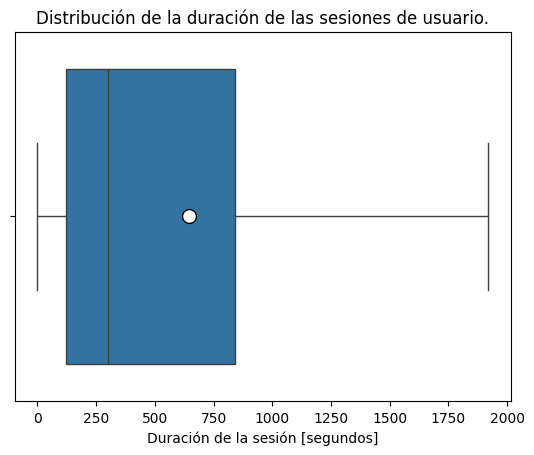

In [21]:
#Creación de un boxplot para mostrar más a detalle la duración de cada sesión.
sns.boxplot(x=visits['session_duration'],showfliers = False,
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'10'}).set(
    xlabel='Duración de la sesión [segundos]',
    title='Distribución de la duración de las sesiones de usuario.'
)
plt.show()

De esta forma sabemos que en un día, tomando en cuenta a todos los usuarios, se tiene un promedio de **987.36 sesiones realizadas**, lo cual concuerda con la métrica DAU obtenida anterioremente, que nos dice que tenemos 907 usuarios activos por día, siendo que cada usuario realiza **1.082 sesiones** promedio al día, es decir, que son contados los usuarios que realizan más de una sesión diaria.

Así mismo, la duración promedio de cada sesión es de 643.51 segundos, lo que es poco más de **10 minutos** por sesión. 
Como observamos en el diagrama de caja, notamos que el tercer cuartil se encuentra alrededor de 850 segundos, es decir, que el 75% de nuestros usuarios realizan sesiones de menos de 15 minutos. La mitad de los usuarios tiene sesiones por debajo de los 300 segundos, es decir, 5 minutos. Esto nos indica que nuestros usuarios realizan sesiones rápidas y no pasan horas en nuestro producto. 


#### Tasa de retención de los usuarios

Nos interesa conocer el porcentaje de usuarios que regresa mes con mes. Para ello será necesario realizar la creación de cohortes mensuales para así hacer el seguimiento mensual de los usuarios que regresan a nuestro servicio.

In [22]:
#Obtenemos la fecha de registro:
first_session_date = visits.groupby(['uid'])['start_ts'].min()
first_session_date.name = 'first_session_date' #Modificamos el nombre del series obtenido
#Agregamos al dataframe 'Visits':
visits = visits.join(first_session_date,on='uid')
#display(visits) #Linea para comprobar resultados

In [24]:
#Para crear los cohortes, debemos extraer el mes y el año de la columna 'first_session_date'
visits['first_session_month'] = pd.to_datetime(visits['first_session_date'],unit='d') - pd.to_timedelta(visits['first_session_date'].dt.day,unit='d')
visits['first_session_month'] = (visits['first_session_month'] + np.timedelta64(1,'D')).dt.date

#También debemos extraer el mes y el año de cada session (columna 'start_ts')
visits['session_y_m'] = pd.to_datetime(visits['start_ts'],unit='d') - pd.to_timedelta(visits['start_ts'].dt.day,unit='d')
visits['session_y_m'] = (visits['session_y_m'] + np.timedelta64(1,'D')).dt.date

#Agrupamos por el cohort(mes de primer sesion) y por el mes de cada sesion
#Contamos el número de usuarios únicos al mes.
visits_gb_cohorts = visits.groupby(['first_session_month','session_y_m']).agg({'uid':'nunique'}).reset_index()

#Obtenemos el ciclo de vida:
visits_gb_cohorts['cohort_lifetime'] = visits_gb_cohorts['session_y_m'] - visits_gb_cohorts['first_session_month']
visits_gb_cohorts['cohort_lifetime'] = round(visits_gb_cohorts['cohort_lifetime'] / np.timedelta64(30, 'D')).astype(int)
#display(visits_gb_cohorts) #Linea para comprobar cambios

In [25]:
#Obtenemos el tamaño del cohorte en su mes 0
initial_users_visits = visits_gb_cohorts[visits_gb_cohorts['cohort_lifetime']==0][['first_session_month','uid']]
initial_users_visits = initial_users_visits.rename(columns={'uid':'cohort_users'}) 
#display(initial_users_visits)
#Agregamos esta información a la tabla donde tenemos la información de los cohortes
retention_report = visits_gb_cohorts.merge(initial_users_visits,on='first_session_month')
#Obtenemos la tasa de retencion
retention_report['retention_rate'] = retention_report['uid'] / retention_report['cohort_users']
display(retention_report) #Mostramos los cambios

,first_session_month,session_y_m,uid,cohort_lifetime,cohort_users,retention_rate
0,2017-06-01,2017-06-01,13259,0,13259,1.000000
1,2017-06-01,2017-07-01,1043,1,13259,0.078664
2,2017-06-01,2017-08-01,713,2,13259,0.053775
3,2017-06-01,2017-09-01,814,3,13259,0.061392
4,2017-06-01,2017-10-01,909,4,13259,0.068557
...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,861,1,20589,0.041818
74,2018-03-01,2018-05-01,557,2,20589,0.027053
75,2018-04-01,2018-04-01,15709,0,15709,1.000000
76,2018-04-01,2018-05-01,760,1,15709,0.048380


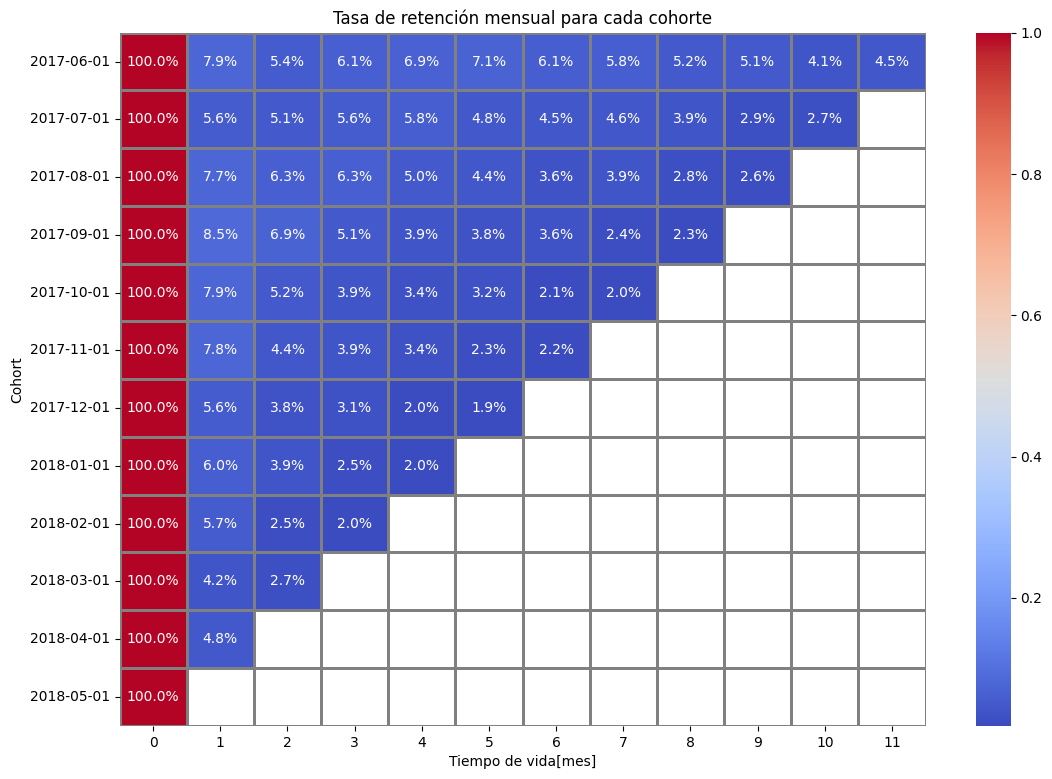

In [26]:
#Creamos la tabla dinámica
retention_pivot = retention_report.pivot_table( index='first_session_month',
                                              columns='cohort_lifetime',
                                               values='retention_rate'
                                              )
#Creamos un mapa de calor para mostrar la información.
#Definimos tamaño de la figura
plt.figure(figsize=(13, 9))
plt.title('Tasa de retención mensual para cada cohorte') #titulo
#Creamos un mapa de calor
sns.heatmap(
    retention_pivot,
    cmap="coolwarm",
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='gray',
)
#Renombramos los ejes
plt.xlabel("Tiempo de vida[mes]")
plt.ylabel("Cohort")
plt.show() #mostramos

Como podemos observar, inicialmente todas presentan un 100% pero esto corresponde al mes 0, cuando tenemos nuestros usuarios totales. En el mes 1, el porcentaje cae abruptamente, y nos indica el número de usuarios que en realidad se quedaron en nuestro servicio, en este caso el mejor cohorte corresponde al de Septiembre de 2017 con una tasa del 8.5% mientras que el peor es el cohorte de Marzo,2018 con una tasa del 4.2%. Sin embargo, podemos señalar que el primer cohorte obtenido Junio,2017 ha mantenido un buen porcentaje de retención a lo largo del tiempo, el cual no ha bajado del 4%, esto es un buen indicador ya que los usuarios que les interesa nuestro servicio siguen presentes.

Pero también es importante señalar que la tasa de retención en cohortes más recientes ha disminuido considerablemente, lo cual nos indica que se deben realizar estrategias para mantenerlos a lo largo del tiempo.


### Ventas

En esta sección nos interesa dar respuesta a las preguntas:
- ¿Cuándo la gente empieza a comprar?
- ¿Cuántos pedidos hacen durante un tiempo dado?
- ¿Cuál es el tamaño promedio de compra?
- ¿Cuánto dinero aporta cada cliente?

Se dedicará una sección para responder cada una de estas preguntas.

#### Tiempo de conversión a cliente:

Nos interesa conocer el tiempo entre que el cliente se registra y se convierte a cliente, es decir, realiza su primer compra.
Para ello debemos utilizar la fecha de su primer sesión en 'Visits' y obtener la fecha de su primer compra en 'Orders'.

In [27]:
#Para conocer el tiempo en el que empiezan a comprar
# Necesitamos conocer la fecha de registro o de primer sesion en el DF 'Visits' y de la primer compra en el DF 'orders'

#Ya obtuvimos la fecha de registro en la sección anterior

#Obtenemos la fecha de la primer compra:
first_order_date = orders.groupby(['uid'])['buy_ts'].min()
first_order_date.name = 'first_order_date' #Modificamos el nombre del series obtenido
#Agregamos al dataframe 'Orders'
orders = orders.join(first_order_date,on='uid')
#display(orders)

In [28]:
#Creamos un dataframe donde almacenaremos ambos Series combinandolo por usuario('uid')
time_to_first_order = pd.merge(first_session_date,first_order_date,on='uid')
#Obtenemos el tiempo total entre la primer orden y la primer sesión del usuario
time_to_first_order['total_time'] = time_to_first_order['first_order_date'] - time_to_first_order['first_session_date']

#Mostramos la descripción estadística de los tiempos entre el registro y la primer compra:
display(time_to_first_order['total_time'].describe())

count                         36523
mean     16 days 21:40:10.550064343
std      47 days 01:44:46.481416776
min                 0 days 00:00:00
25%                 0 days 00:04:00
50%                 0 days 00:16:00
75%                 2 days 00:17:00
max               363 days 07:04:00
Name: total_time, dtype: object

Notamos que se tienen los siguientes valores:
- **Tiempo mínimo** entre el registro y la primer compra: 0 segundos; lo que significa que el registro se dió junto a su primer orden. Hay plataformas que nos permiten agregar elementos al carrito sin tener una cuenta y el registro se realiza un paso antes de hacer el pago, este puede ser el caso.
- **Tiempo máximo** entre el registro y la primer compra: 363 días con 7 horas, es decir, que tenemos la presencia de usuarios que realizaron su registro y no hicieron alguna compra hasta varios meses después, siendo este el caso más extenso. 

Este último punto es bastante importante, ya que tenemos una **mediana** de 16 minutos, mostrando que la mitad de nuestros usuarios tardaron en comprar *hasta* 16 minutos después de su registro, y con el **tercer cuartil**, sabemos que una cuarta parte de los usuarios tardaron entre 16 minutos hasta un máximo de 2 días con 17 minutos. Esto nos indica que *no podemos confiar* en la **media** de 16 días con casi 22 horas, ya que esta se ve sesgada por los usuarios que tardaron bastante tiempo en realizar su primer compra.

In [29]:
#Obtenemos y mostramos la moda
print('Moda:',time_to_first_order['total_time'].mode()[0])
#Mostramos el porcentaje de usuarios que realizan su primer compra en la primer hora después de registrarse
first_hour_percentage = time_to_first_order[time_to_first_order['total_time']<='1 hour']['total_time'].count() / time_to_first_order.shape[0] *100
print('Porcentaje de usuarios que realizaron su primer comprar en la primer hora de registro {} %'.format(round(first_hour_percentage,2)))

Moda: 0 days 00:01:00
Porcentaje de usuarios que realizaron su primer comprar en la primer hora de registro 61.9 %


Otra variable estadística que nos sirve conocer en estos casos es la **moda** la cual nos indica el valor que más se repite en nuestro conjunto de datos, en este caso, el tiempo entre el registro y la primer compra que más se repite es de 1 minuto.

También mostramos el porcentaje de usuarios que realizaron su primer compra en la primer hora después de su registro: 61.9% esto es muy importante ya que nos indica que la mayor parte de clientes atraidos, realizan su registro con la intención de realizar una compra al momento. 

#### Análisis por cohorte

Ahora analizaremos cómo es el comportamiento de los usuarios a través del tiempo, como tenemos datos sobre un año entero de operaciones, crearemos cohortes mensuales. De esta forma, obtendremos la siguiente información para cada mes, pero nos interesa solo la información de los clientes que han realizado pedidos, por lo que trabajaremos con el dataframe 'orders'.

De primera mano, obtendremos los cohortes mensuales y calcularemos valores de interés: Ingreso total, pedidos totales y usuarios del cohorte.

In [30]:
#Para crear los cohortes, debemos extraer el mes y el año de la columna 'first_order_date'
orders['first_order_month'] = pd.to_datetime(orders['first_order_date'],unit='d') - pd.to_timedelta(orders['first_order_date'].dt.day,unit='d')
orders['first_order_month'] = (orders['first_order_month'] + np.timedelta64(1,'D')).dt.date

#También debemos extraer el mes y el año de cada compra (columna 'buy_ts')
orders['order_month'] = pd.to_datetime(orders['buy_ts'],unit='d') - pd.to_timedelta(orders['buy_ts'].dt.day,unit='d')
orders['order_month'] = (orders['order_month'] + np.timedelta64(1,'D')).dt.date
display(orders)
#Agrupamos por el cohort(mes de primer order) y por el mes de cada orden
#Contamos el número de ordenes al mes, el ingreso total al mes y el numero de usuarios únicos al mes.
orders_gb_cohorts = orders.groupby(['first_order_month','order_month']).agg({
    'buy_ts':'count','revenue':'sum','uid':'nunique'})

#Cambiamos el nombre de las columnas
orders_gb_cohorts.columns = ['total_orders','total_revenue','n_users']

#Reseteamos el index
orders_gb_cohorts = orders_gb_cohorts.reset_index()
#Linea para mostrar resultado
display(orders_gb_cohorts)

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01


,first_order_month,order_month,total_orders,total_revenue,n_users
0,2017-06-01,2017-06-01,2354,9557.49,2023
1,2017-06-01,2017-07-01,177,981.82,61
2,2017-06-01,2017-08-01,174,885.34,50
3,2017-06-01,2017-09-01,226,1931.30,54
4,2017-06-01,2017-10-01,292,2068.58,88
...,...,...,...,...,...
74,2018-03-01,2018-05-01,176,1114.87,58
75,2018-04-01,2018-04-01,2495,10600.69,2276
76,2018-04-01,2018-05-01,195,1209.92,69
77,2018-05-01,2018-05-01,3249,13925.76,2988


In [33]:
#Obtenemos el ciclo de vida:
orders_gb_cohorts['cohort_lifetime'] = orders_gb_cohorts['order_month'] - orders_gb_cohorts['first_order_month']
orders_gb_cohorts['cohort_lifetime'] = round(orders_gb_cohorts['cohort_lifetime'] / np.timedelta64(30, 'D')).astype(int)

#Linea para mostrar resultado
display(orders_gb_cohorts)

,first_order_month,order_month,total_orders,total_revenue,n_users,cohort_lifetime
0,2017-06-01,2017-06-01,2354,9557.49,2023,0
1,2017-06-01,2017-07-01,177,981.82,61,1
2,2017-06-01,2017-08-01,174,885.34,50,2
3,2017-06-01,2017-09-01,226,1931.30,54,3
4,2017-06-01,2017-10-01,292,2068.58,88,4
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,176,1114.87,58,2
75,2018-04-01,2018-04-01,2495,10600.69,2276,0
76,2018-04-01,2018-05-01,195,1209.92,69,1
77,2018-05-01,2018-05-01,3249,13925.76,2988,0


##### Ordenes promedio por cliente

En esta sección responderemos a la pregunta '¿Cuántos pedidos hacen durante un tiempo dado?', de manera que nos interesa conocer el número promedio de órdenes por usuario al mes.

In [34]:
#Obtenemos el número de órdenes promedio
orders_gb_cohorts['orders_per_user'] = orders_gb_cohorts['total_orders'] / orders_gb_cohorts['n_users']

#Creamos la tabla dinamica para mostrar los cambios en las ordenes por usuario:
orders_per_user_pivot = orders_gb_cohorts.pivot_table(
                                index = 'first_order_month',
                                columns = 'cohort_lifetime',
                                values = 'orders_per_user'
)
#Línea para mostrar el resultado:
#display(orders_per_user_pivot)

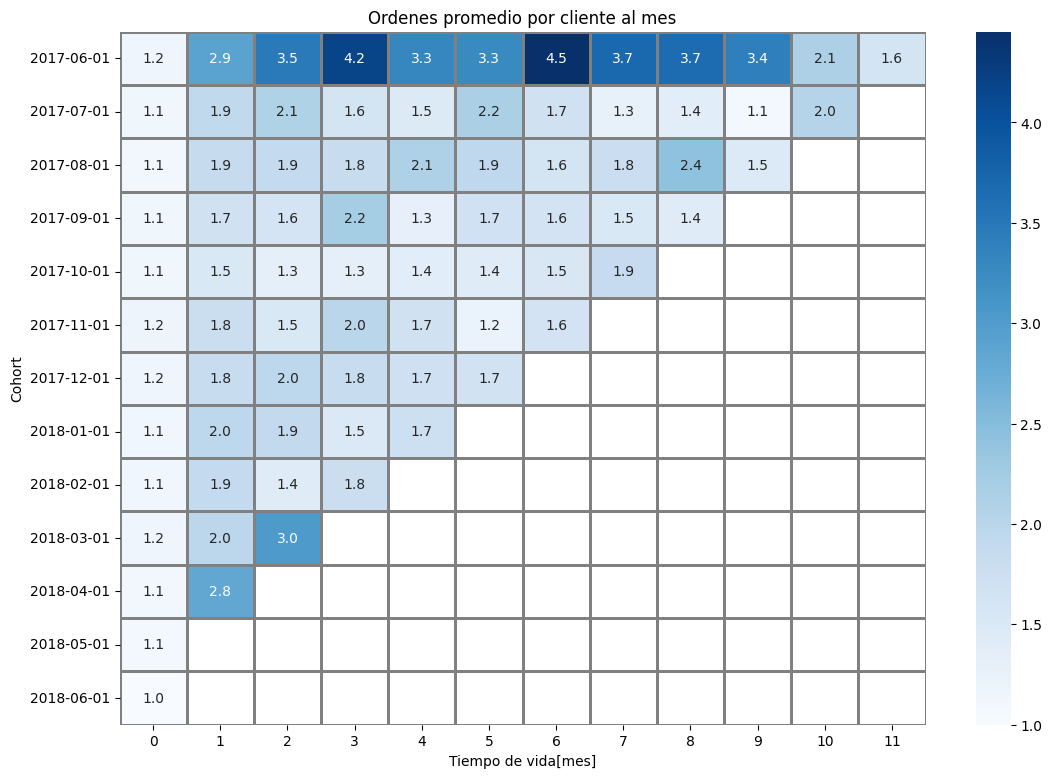

In [35]:
#Creamos un mapa de calor para mostrar la información.
#Definimos tamaño de la figura
plt.figure(figsize=(13, 9))
plt.title('Ordenes promedio por cliente al mes') #titulo
#Creamos un mapa de calor
sns.heatmap(
    orders_per_user_pivot,
    cmap="Blues",
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)
#Renombramos los ejes
plt.xlabel("Tiempo de vida[mes]")
plt.ylabel("Cohort")
plt.show() #mostramos

Observamos que el primer cohorte (Junio,2017) tiene los mejores números de órdenes promedio mensuales, donde los meses 3 y 6 de su ciclo de vida presentan picos de hasta 4.5 órdenes por cliente. 

Los cohortes de clientes creados desde el mes de Octubre,2017 a Febrero,2018 son los que presentan los "peores" números ya que su pico máximo son 2 órdenes promedio por cliente, lo que nos indica que algo afectó las ventas para los nuevos clientes en estos meses. Esto porque los cohorts más nuevos (Marzo y Abril,2018) presentan números más cercanos al primer cohorte(Junio,2017), con lo que podríamos suponer que tendrán mejores ventas a lo largo del tiempo.

##### Precio promedio por compra

En esta sección responderemos las pregunta '¿Cuál es el tamaño promedio de compra?', lo que significa que nos interesa conocer el precio promedio de cada compra al mes. 

In [36]:
#Obtenemos el número de órdenes promedio
orders_gb_cohorts['revenue_per_order'] = orders_gb_cohorts['total_revenue'] / orders_gb_cohorts['total_orders']

#Creamos la tabla dinamica para mostrar los cambios en las ordenes por usuario:
revenue_per_order_pivot = orders_gb_cohorts.pivot_table(
                                index = 'first_order_month',
                                columns = 'cohort_lifetime',
                                values = 'revenue_per_order'
)
#Línea para mostrar el resultado:
#display(revenue_per_user_pivot)

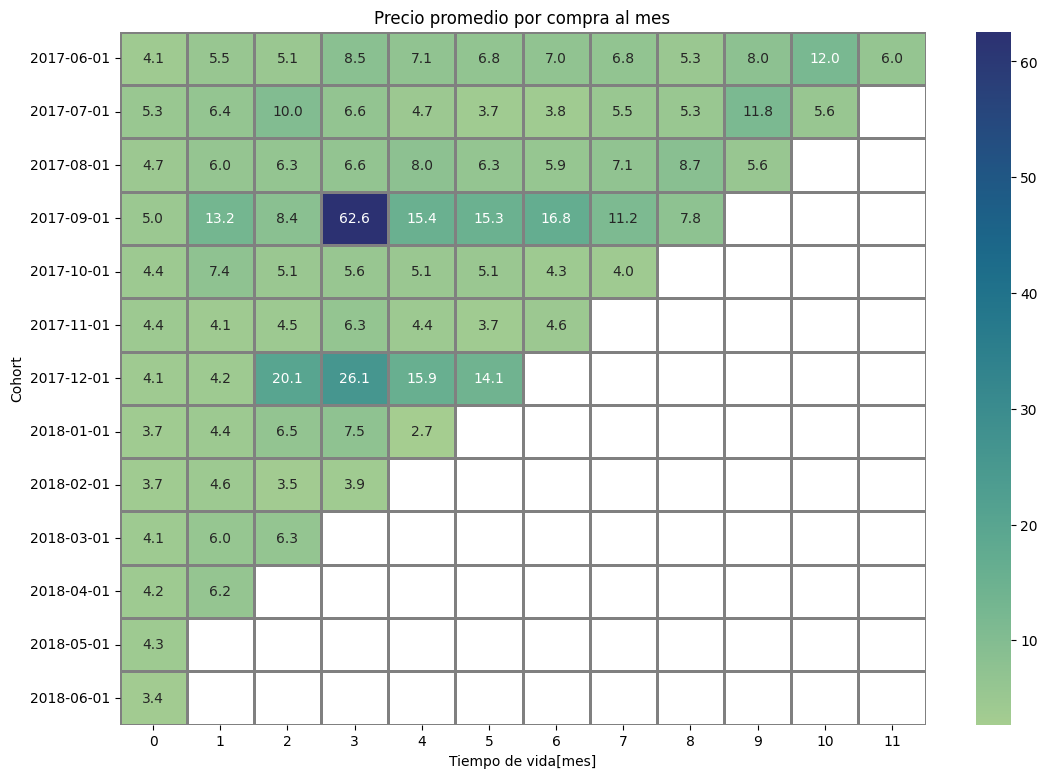

In [37]:
#Definimos tamaño de la figura
plt.figure(figsize=(13, 9))
plt.title('Precio promedio por compra al mes') #titulo
#Creamos un mapa de calor
sns.heatmap(
    revenue_per_order_pivot,
    cmap="crest",
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)
#Renombramos los ejes
plt.xlabel("Tiempo de vida[mes]")
plt.ylabel("Cohort")
plt.show() #mostramos

Este gráfico es muy interesante, ya que al complementarse con el número de pedidos promedio al mes, notamos que a pesar que el cohort de Septiembre,2017 tiene un promedio de 2 órdenes promedio en el tercer mes de su ciclo de vida, el precio promedio de estas 2 compras es de 62.6 dolares. Justo este mes corresponde a diciembre de ese mismo año, lo que nos indica que hubo un producto de costo elevado que atrajo la atención de este grupo de personas, y probablemente la compra se vio influenciada por las fechas decembrinas. 

En la sección anterior, señalamos con interés los cohortes: Junio,2017, Marzo y Abril, 2018, los cuales presentan los mejores números en órdenes promedio mensuales, y también notamos que coinciden en el precio promedio de las órdenes, las cuales tienen un rango de 4 a 12 dólares. De esta forma, podemos decir que estos grupos de personas realizan múltiples compras de precios moderados. 

De igual forma, señalamos los cohortes creados de Octubre,2017 a Febrero, 2018, los cuales no presentaban más de 2 órdenes promedio al mes y en esta sección no es la excepción, los precios promedio de cada compra realizada también son relativamente bajos, yendo desde los 3.5 dolares hasta los 6.5 dolares con casos muy puntuales que llegan a los 7 dólares.

Solo es importante señalar, que de este último grupo el cohorte de Diciembre,2017 es la excepción, ya que a partir de su segundo mes de ciclo de vida aumentaron el precio de las órdenes promedio hasta 20 dólares, siguen presentando pocas órdenes por cliente, pero cada órden tiene bastante más valor.


##### Valor del costo de vida (LTV)

En esta sección, respondemos a la pregunta '¿Cuánto dinero aporta cada cliente?', por lo que se desea obtener el valor "de vida" de cada usuario, es decir, la cantidad total de dinero que un usuario aporta a la empresa en promedio al realizar compras.

In [38]:
#Obtenemos el tamaño inicial de cada cohorte
cohort_sizes = orders.groupby(['first_order_month']).agg({'uid':'nunique'}).reset_index()
#Cambiamos nombre
cohort_sizes.columns = ['first_order_month','n_users_initial']
#Agregamos al DF orders_gb_cohorts, obtenido anteriormente
report = pd.merge(cohort_sizes,orders_gb_cohorts,on='first_order_month')
#Calculamos LTV mensual
report['ltv'] = report['total_revenue'] / report['n_users_initial']
#Agrupamos para obtener la información bien acomodada
output = report.pivot_table(index='first_order_month',
                            columns='cohort_lifetime',
                            values='ltv'
                           ).round(2)
#Linea para comprobar resultado
display(output)
ltv_acum = output.cumsum(axis=1).round(2)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,NaN
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,NaN,NaN
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,NaN,NaN,NaN
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,NaN,NaN,NaN,NaN
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.11,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,0.29,0.30,0.14,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,0.28,0.08,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


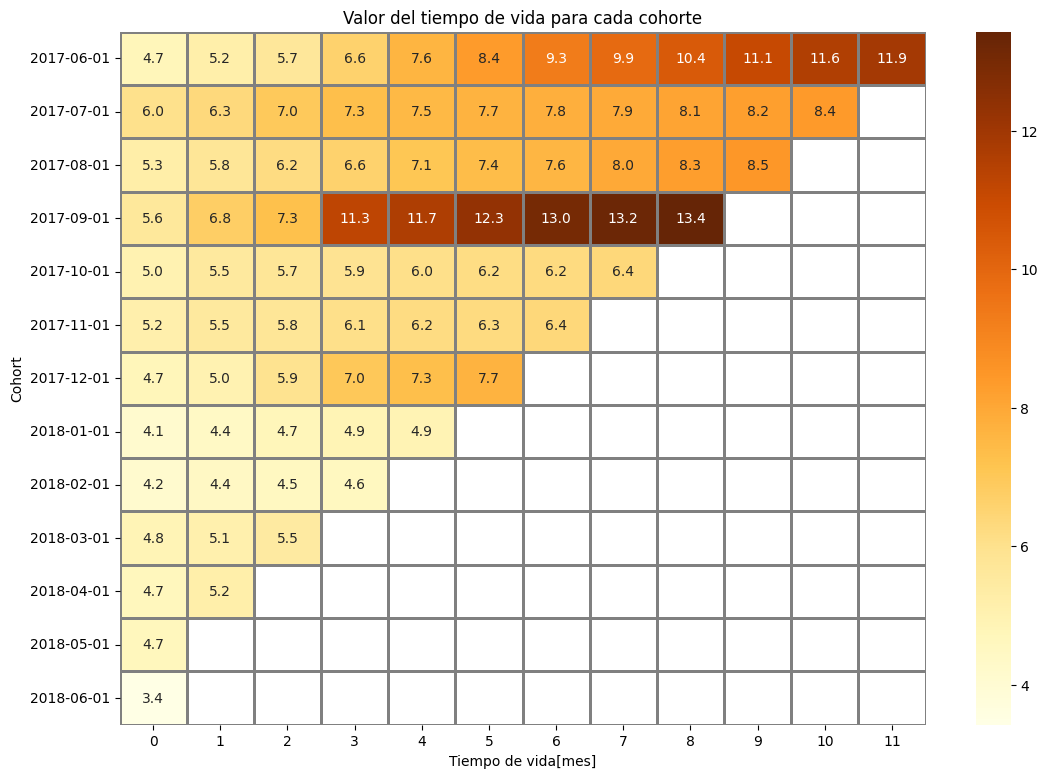

In [39]:
#Visualización del LTV a través del tiempo para cada cohorte
#Creamos un mapa de calor para mostrar la información.
#Definimos tamaño de la figura
plt.figure(figsize=(13, 9))
plt.title('Valor del tiempo de vida para cada cohorte') #titulo
#Creamos un mapa de calor
sns.heatmap(
    ltv_acum,
    cmap="YlOrBr",
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)
#Renombramos los ejes
plt.xlabel("Tiempo de vida[mes]")
plt.ylabel("Cohort")
plt.show() #mostramos

En esta representación del valor de cada cliente para la empresa notamos que la mayoría de los cohortes comienzan con un valor entre 4 y 6 dólares por cliente, por lo que el cohorte de Junio,2018 presenta números muy bajos por el momento y es un factor que se debe tomar bastante en cuenta.

Notamos que los cohortes Junio y Septiembre, 2017 son los que presentan mejores números sobrepasando los 10 dólares por cliente. lo cual se corrobora con los resultados obtenidos anteriormente. Por ejemplo, el cohorte de Septiembre obtuvo valores de precio de compra muy altos en su mes 3, y justo en este gráfico notamos que el valor de cada cliente subió bastante en ese mismo mes. 

Por otro lado, notamos que los meses de Enero y Febrero,2018 presentan números bastante bajos y que al ser un valor acumulativo, es de preocuparse que no se tenga un avance más pronunciado.

In [61]:
#Creamos una función para obtener el LTV para cada cohorte
def ltv_per_cohort(df):
    #Inicializamos listas
    ltv_values = []
    cohorts = []
    #Recorremos para cada cohort
    for cohort in df.index:
        aux = df.loc[cohort].sum().round(2) #Obtenemos el LTV total
        ltv_values.append(aux) #Agregamos a la lista
        cohorts.append(cohort) #Agregamos a la lista del cohorte
    #Creamos un diccionario con la información
    data = {'cohort': cohorts, 'ltv': ltv_values}
    #Creamos un DF
    ltv_per_cohort = pd.DataFrame(data)
    #Hacemos transformacion para obtener los cohortes solo como '2017-01'
    ltv_per_cohort['cohort'] = pd.to_datetime(ltv_per_cohort['cohort']).dt.to_period('M')
    ltv_per_cohort['cohort'] = ltv_per_cohort['cohort'].astype('str')
    return ltv_per_cohort #Regresamos el valor

In [64]:
#Calculamos el LTV para nuestro grupo de cohortes
ltv_cohort_result = ltv_per_cohort(output)
#Linea para comprobar resultado
#print(ltv_cohort_result)

#Creamos un gráfico para comparar el LTV de cada cohorte creado
fig_2 = px.bar(ltv_cohort_result,
               x='ltv',y='cohort', text='ltv', 
               color = 'cohort',
               title='Cantidad total que aporta cada usuario de cada cohort',
              labels={'cohort': 'Cohort', 'ltv':'Cantidad que aporta [$]'},orientation='h')
fig_2.update_yaxes(tickangle=0, tickvals = list(ltv_cohort_result['cohort'])) #Mostramos el cohorte en el eje Y
fig_2.show() #Mostramos

Observamos que el cohort correspondiente a Septiembre del 2017, es que tiene los usuarios más "valiosos" para la empresa, ya que cada usuario aporta 13.43 dólares en promedio durante todo su ciclo de vida, y tiene completo sentido ya que justo es el cohorte que presenta el pico de 62.5 dólares de precio promedio por cada compra. 

En segundo lugar, tenemos al cohorte de Junio del 2017, el cual si bien no tiene los precios por compra más altos, sí presenta los mejores ordenes promedio realizadas durante todo su ciclo de vida, es decir, compensan las órdenes de precios no tan altos, con la cantidad de órdenes que realizan. 

Como señalamos anteriormente, los cohortes de Octubre y Noviembre del 2017 junto con Enero y Febrero de 2018, muestran una cierta decadencia tanto en el número de órdenes promedio como en el precio promedio de cada órden. Sin embargo, como señalamos en la sección anterior, el cohort de Diciembre de 2017, repuntó en el valor de cada cliente al mejorar los precios promedio de cada compra a partir de su tercer mes. 


### Marketing

En esta sección nos interesa dar respuesta a las preguntas:
- ¿Cuánto dinero se gastó?
- ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
- ¿Cuán rentables eran las inversiones?

Se dedicará una sección para responder cada una de estas preguntas.

#### Costo de las fuentes de adquisición

En esta sección respondemos a la pregunta '¿Cuánto dinero se gastó?', es decir, nos interesa saber cuál fue el total de los costos para cada fuente de adquisición a lo largo del tiempo. 

In [65]:
#Costo de las fuentes de adquisición

#Obtenemos los meses de las fecha de cada gasto realizado en el DF 'Costs'
costs['date_month'] = pd.to_datetime(costs['dt'],unit='d') - pd.to_timedelta(costs['dt'].dt.day,unit='d')
costs['date_month'] = (costs['date_month'] + np.timedelta64(1,'D')).dt.date

In [66]:
#Agrupamos por mes y por fuente
costs_per_month = costs.groupby(['source_id','date_month']).agg({'costs':'sum'})
#Obtenemos el costo total de cada fuente
total_cost = costs.groupby(['source_id']).agg({'costs':'sum'}).round(2).reset_index()
total_cost['source_id'] = total_cost['source_id'].astype('str')
#display(costs_per_month)
#display(total_cost)

In [67]:
#Creamos una figura para mostrar los costos mensuales de cada fuente.
fig_3 = px.line(costs_per_month.reset_index(),
                x='date_month',y='costs',
                symbol='source_id',
                color='source_id',
                title='Costos mensuales de cada fuente de adquisición',
                labels={'costs': 'Gasto realizado[$]', 'date_month':'Mes en el que se realizó','source_id':'ID de la fuente'})
fig_3.show()

Observamos que la fuente de adquisición 3 es la que más gastos mensuales presenta durante todo nuestro análsis, teniendo un gasto mínimo de 6000 dólares en agosto de 2017 y teniendo un gasto máximo en noviembre de 2017. Las fuentes que menos gastos significaron fueron la 9 y 10 siendo menos de 500 dólares mensuales en cada una. Por último, notamos que todas las fuentes presentan una pequeña baja en agosto de 2017 y posteriormente suben paulatinamente los costos alcanzando un máximo en noviembre y diciembre de 2017, a partir de ahí empiezan a decaer hasta llegar a un mínimo en abril de 2017.  

In [68]:
#Figura para mostrar los gastos totales de cada fuente de adquisición
fig_4 = px.bar(total_cost,
               x='source_id',y='costs', text='costs', 
               color = 'source_id',
               title='Costo total de cada fuente de adquisición',
              labels={'source_id': 'Fuente de adquisición', 'costs':'Gasto realizado[$]'})
fig_4.show()

Como era de esperarse, la fuente de adquisición 3 es la que mayor gasto representa para la empresa, con un total de 141,321 dólares, mientras que las fuentes 9 y 10, solo tuvieron un costo menor a 6,000 dólares cada una. 

Igual podemos señalar que la fuente de adquisición 3 tiene un costo casi equivalente al de la suma de las fuentes 2, 4 y 5. De esta forma, debemos analizar si el costo de la fuente 3 en verdad está justificado o es necesario reducir costos.



#### Costo de adquisición de Clientes (CAC)


En esta sección responderemos la pregunta '¿Cuál fue el costo de adquisición de clientes para cada una de las fuentes?'.  

In [69]:
#Debemos recuperar los usuarios convertidos para cada fuente
#En el DF time_to_first_order tenemos en el índice a los usuarios convertidos
#Unimos sobre 'uid' y agregamos 'first_order_date'
visits_filtered = visits.merge(time_to_first_order.reset_index()[['uid','first_order_date']],on='uid')
#Recuperamos el mes de conversión(primer mes de compra)
visits_filtered['first_order_month'] = pd.to_datetime(visits_filtered['first_order_date'],unit='d') - pd.to_timedelta(visits_filtered['first_order_date'].dt.day,unit='d')
visits_filtered['first_order_month'] = (visits_filtered['first_order_month'] + np.timedelta64(1,'D')).dt.date
#Línea para comprobar resultados
#display(visits_filtered)

In [70]:
#Obtenemos el número de usuarios TOTALES por fuente:
total_users_per_source = visits_filtered.groupby(['source_id']).agg({'uid':'nunique'})
#Aparece una fuente 7 pero no tenemos esa informacion en los costos, así que la elminamos
total_users_per_source.drop([7], axis=0, inplace=True)
total_users_per_source.reset_index(inplace=True)

In [71]:
#Calculamos el CAC Total de cada fuente:
total_users_per_source['source_id'] = total_users_per_source['source_id'].astype('str')
cac_total = total_cost.merge(total_users_per_source,on='source_id') #Unimos los costos totales con los usuarios totales de cada fuente
cac_total['cac'] = round(cac_total['costs'] / cac_total['uid'],2)  #Obtenemos el cac para cada fuente
cac_total.columns = ['source_id','total_cost','total_users','total_cac']
display(cac_total) #Mostramos

,source_id,total_cost,total_users,total_cac
0,1,20833.27,7138,2.92
1,2,42806.04,7305,5.86
2,3,141321.63,13846,10.21
3,4,61073.60,14253,4.28
4,5,51757.10,10156,5.10
5,9,5517.49,2793,1.98
6,10,5822.49,1773,3.28


In [72]:
#Mostramos los resultados en una figura
fig_5 = px.bar(cac_total,
               x='source_id',y='total_cac', 
               color = 'source_id',
               title='Costo de adquisición de clientes total para cada fuente de adquisición',
              labels={'source_id': 'Fuente de adquisición', 'total_cac':'Costo de adquisición'})
fig_5.show()

Como venimos viendo la fuente de adquisición 3 es la que más inversión tiene por parte de la empresa, y es la segunda fuente que más clientes atrae(13,846 clientes), cada cliente es bastante 'caro', ya que tienen un costo de 10.21 dólares.

La fuente de adquisición 4 es una muy buena fuente ya que los clientes tienen un costo razonable de 4.28 dólares y es la fuente que más clientes atrae.

La fuente 9 es la que menos costos ha representado y aquí lo comprobamos, ya que cada cliente de esta fuente tiene un costo de poco menos 2 dólares. En gráficos anteriores, notamos que la fuente 10 representaba un costo muy parecido al de la fuente 9. Sin embargo, aquí notamos que los clientes de esta fuente tienen un costo bastante alto siendo que son la fuente con menos clientes totales(1773). Incluso la fuente 1 tiene un costo menor y tiene una mejor base de clientes con 7,138.

In [73]:
#Obtenemos el número de usuarios convertidos mensuales por fuente:
monthly_users_per_source = visits_filtered.groupby(['source_id','first_order_month']).agg({'uid':'nunique'})
#Reseteamos el indice de ambos DF para después usar merge
monthly_users_per_source.reset_index(inplace=True)
costs_per_month.reset_index(inplace=True)

In [74]:
#Renombramos las columnas
monthly_users_per_source.columns = ['source_id','date_month','n_users']
#Juntamos la información de los costos mensuales y los usuarios mensuales por fuente
monthly_cac = costs_per_month.merge(monthly_users_per_source,
                                    how='left',
                                    on=['source_id','date_month'])
#Obtenemos el cac mensual para cada fuente
monthly_cac['cac'] = round(monthly_cac['costs'] / monthly_cac['n_users'],2)
#Linea para comprobar resultados
#display(monthly_cac)

In [75]:
#Mostramos la información
fig_6 = px.line(monthly_cac,x='date_month',y='cac',symbol='source_id',color='source_id',
                title='Costo de adquisición de clientes mensual para cada fuente de información.',
                labels={'date_month': 'Mes en el que se realizó', 'cac':'Costo de adquisición[$]','source_id':'Fuente de adquisición'})
fig_6.show()

Si validamos la información obtenida en este gráfico con el gráfico de 'Costo de las fuentes de adquisición', recordamos que la fuente de adquisición 3 presentaba un pico que comenzaba en agosto y terminaba en abril. Justo aquí notamos algo interesante, entre agosto y abril los costos de adquisición disminuyeron para la fuente 3, esto nos indica que a pesar de invertirse más dinero, el **costo por adquirir cada cliente** disminuyó, significando que se atrayeron los clientes suficientes para que cada uno "costara menos". 

Podemos notar un patrón similar aunque no tan marcado en las fuentes 1, 2 y 4.

La fuente de adquisición 10 es la que más fluctuaciones tiene en el costo de adquisición de cada cliente, donde la mitad del año presentó un costo predominante por encima de los 4 dólares por cliente al mes. Sin embargo, este número se ha reducido a partir de febrero de 2018 siendo un poco por encima de los 2 dólares.

La fuente 9 se mantuvo como la fuente que tiene un menor costo por cliente rondando los 2 dólares durante casi todo el año, sin embargo en los meses abril y mayo presentó un incremento que duplicó su costo, por lo que es necesario vigilar cómo se mantienen los costos en esta fuente.


#### Rentabilidad de las inversiones (ROMI)

En esta sección se responderá la pregunta '¿Cuán rentables eran las inversiones?', es decir, obtendrémos el retorno de inversión. 

**Nota:** Se intentó realizar el retorno de inversión por fuente de adquisición pero la forma en la que se tiene disponible la información en los dataframes no permite determinar para qué fuente fue realizada cada orden, es decir, obtener la información necesaria del dataframe 'Visits' y 'Orders' para conocer los ingresos de cada fuente de adquisición. Por lo que se realizó el análisis para cada cohorte.

In [76]:
#Obtenemos los costos mensuales
monthly_costs = costs.groupby('date_month')['costs'].sum()

#Juntamos esta información junto la obtenida en el DF 'report'
#el cual tiene información sobre los cohortes realizados en el calculo del LTV

report_ = pd.merge(report,monthly_costs,
                   left_on='first_order_month',right_on='date_month')

#Calculamos el Costo de Adquisición de Clientes para cada cohorte
report_['cac'] = report_['costs'] / report_['n_users_initial']
#Calculamos el retorno de inversión para cada cohort
report_['romi'] = report_['ltv'] / report_['cac']
#display(report_)

#Obtenemos la pivot table por cohorte donde mostramos el ROMI para cada uno
output_2 = report_.pivot_table(index='first_order_month',
                              columns='cohort_lifetime',
                               values='romi')

#Como necesitamos el acumulado, lo calculamos.
romi_acum = output_2.cumsum(axis=1).round(2)
#Obtenemos el cohort promedio
avg_cohort = output_2.cumsum(axis=1).mean(axis=0)
#display(romi_acum)
#display(avg_cohort)

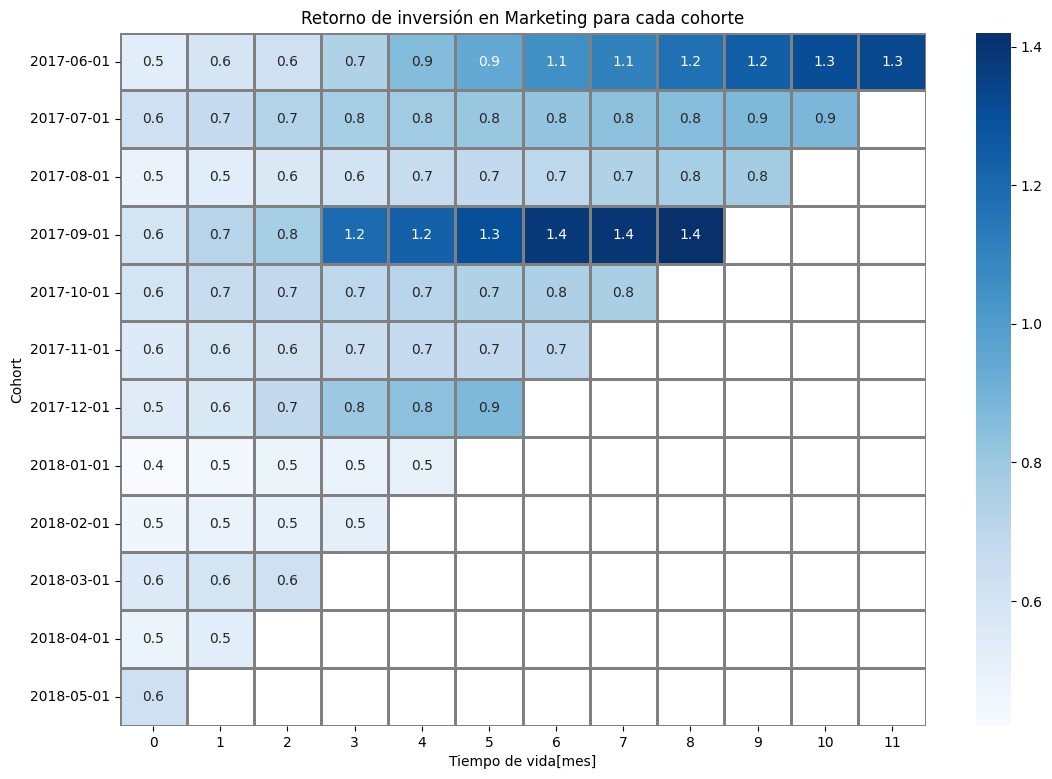

In [77]:
#Creamos un mapa de calor para mostrar la información.
#Definimos tamaño de la figura
plt.figure(figsize=(13, 9))
plt.title('Retorno de inversión en Marketing para cada cohorte') #titulo
#Creamos un mapa de calor
sns.heatmap(
    romi_acum,
    cmap="Blues",
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)
#Renombramos los ejes
plt.xlabel("Tiempo de vida[mes]")
plt.ylabel("Cohort")
plt.show() #mostramos

Como habiamos señalado en la sección de 'Análisis por cohorte', el cohorte de Junio,2017 es el que más órdenes promedio por cliente presentaba, y eso se ve reflejado aquí, donde notamos que a partir del mes 6 de su tiempo de vida ya se *compensan* los gastos que se realizaron para atraer estos clientes. 
Así mismo, el cohorte de Septiembre de 2017, presentó los mejores precios promedio por compra en su 3er mes de vida, y aquí notamos que estas compras 'grandes' que hicieron los clientes sirvieron para compensar el costo que este cohorte significó para la empresa. 
En este mismo rubro, el cohorte de Diciembre de 2017 también mostraba buenos números en los precios promedio por compra, sin embargo vemos que aún no se tiene un retorno de inversión mayor a uno pero bastante cercano, esperando que se logre en los meses posteriores. 

Por último habíamos señalado que los cohortes de octubre a febrero, presentaban bajas órdenes y con precios no tan elevados, lo que nos da como resultado que aún no se compense la inversión y en ninguno de estos cohortes y se vea un avance bastante lento. 



In [78]:
#Mostramos la información
fig_7 = px.scatter(avg_cohort,
                title='Retorno de Inversión en Marketing para el cohorte promedio',
                labels={'cohort_lifetime': 'Tiempo de vida[mes]', 'value':'Retorno de Inversión','variable':''},
                  )

fig_7.add_shape(type="line",
    x0=-1, y0=1, x1=12, y1=1,
    line=dict(color="Red",width=2)
 )
fig_7.update_traces(marker={'size': 12})
fig_7.add_annotation(x=6, y=1,
            text='Retorno de inversión asegurada',
            showarrow=False,
            yshift=10)

fig_7.show()

Por último, obtenemos el retorno de inversión en marketing para el cohorte promedio, en este caso notamos que a partir del mes 8 ya se deben tener números buenos, pero la inversión se ve asegurada a partir del **mes 10 del tiempo de vida**. 

Esto nos da esperanzas en la mayoría de los cohortes analizados en el año de información que nos fue brindada (ya que solo dos han cumplido al menos 10 meses de vida) y nos indica que los cohortes de Junio y Septiembre de 2017, son atípicos al tener un retorno de inversión favorable en unos cuantos meses.

Por lo tanto, es necesario esperar al menos 10 meses para determinar si se compensaron los gastos de cada cohorte.


## Conclusiones


En este proyecto encontramos **información sobre los usuarios** bastante interesante, como:
- El tiempo de conversión de la mayoría de los usuarios es de 1 minuto, es decir, que los usuarios se registran con la intención de realizar una compra. 
- Las tasas de retención mensuales que obtuvimos van del 4% al 8%, de manera que números por debajo de estos límites nos indican que se deben crear estrategias para mantener a los usuarios. 
- El primer cohorte obtenido (Junio,2017) es uno que presenta muy buenos números en general: Realizan bastantes órdenes por cliente al mes, el precio de estas órdenes es muy decente, el costo de vida de cada uno de estos clientes es de 11 dólares(siendo el segundo más alto) y se compensó la inversión para este cohorte en el mes 6 de su tiempo de vida. 
- El cohorte de Septiempre, 2017 es el segundo que mejores números obtuvo, no realizan tantas órdenes mensuales pero el precio de cada una es bastante elevado, el costo de vida es el más alto con 13 dólares y su retorno de inversión se dió en el mes 3 de su tiempo de vida. 

Sin embargo, estos dos cohortes señalados son la excepción a la regla, ya que ninguno de los demás cohortes ha presentado un retorno de inversión durante el primer año, pero esto es normal ya que este retorno de inversión se espera que ocurra durante el mes 10 del tiempo de vida de cada cohorte, como se obtuvo en la información del *cohorte promedio*.

Respecto a **las fuentes de adquisición** obtuvimos:
- La fuente de adquisición **4** es la que más clientes atrae y es la que tiene el segundo costo total más alto, pero el costo por usuario es bastante bueno con 4.28 dólares por cliente. Por lo que considero es la mejor fuente de clientes que tiene la empresa.
- La fuente de adquisición **3** es la que más costo representa para la empresa pero es la segunda que mayor cantidad de usuarios atrae. Sin embargo, los clientes en esta fuente son bastante costosos con 10.2 dólares por cliente, por lo que es necesario evaluar si es necesaria tanta inversión o si es posible destinar algunos recursos a otras fuentes.
- La fuente de adquisición **2** tiene una base de clientes bastante similar a la fuente de adquisición **1** pero, tanto en costos totales como en costo por adquisición de cada cliente, representa el doble de lo que se gasta en la fuente **1**. Incluso se puede considerar la segunda fuente con mayor costo por cliente, lo que es bastante alarmante por la cantidad de clientes que atrae. Por lo que considero importante evaluar si es necesario mantenerla o modificar la inversión de la misma para destinar los recursos a otras fuentes.  
- La fuente de adquisición **10** representó un costo por cliente bastante elevado respecto a la cantidad de clientes que atrae durante la mayor parte del año, sin embargo los dos últimos meses el costo por cliente disminuyó considerablemente. Mi recomendación es que a pesar de no reflejar un costo total tan elevado (5800 dolares), se debe prestar bastante atención en los costos por clientes próximos para determinar si es necesario mantener o descargar esta fuente.

- Entre los meses de agosto del 2017 a abril de 2018, se notó un pico de aumento en los costos mensuales de cada fuente, los cuales reflejaron sus resultados en el costo de adquisición de clientes. Es decir, que a pesar de aumentar la inversión en la fuente, cada cliente tiene un costo menor, indicando que la cantidad de clientes aumentó. Esto tuvo resultados favorables en las fuentes de adquisición **2, 3 y 4.** En las demás, no funcionó tanto esta dinámica ya que se presentaron varios incrementos en diferentes puntos durante este periodo. 

Recapitulando un poco, las fuentes de adquisición que considero tienen mejores números entre la plantilla de usuarios que aporta y el costos de cada uno son las fuentes **1 y 4**. Las fuentes que considero que son muy costosas para la cantidad de usuarios que aporta son las fuentes **2 y 3** y por último, sugiero prestar bastante atención en la fuente **10** ya que si su costo aumenta en los siguientes meses, pasaría a la categoría de ser muy costosa para los clientes que aporta. 